<a href="https://colab.research.google.com/github/anindyaroy/learnAgenticAI/blob/main/M5_L2_Simple_LLM_Chain_with_LCEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring LLM Chains with LCEL

## Install OpenAI, and LangChain dependencies

In [ ]:
# Updated package versions and import paths
# Ensures consistency with changes in earlier modules
!pip install langchain==0.3.26
!pip install langchain-openai==0.3.28
!pip install langchain-community==0.3.27

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
# for drawing text graphs
!pip install grandalf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.8 MB/s eta 0:00:00


## Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Setup Environment Variables

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Load Connection to LLM

Here we create a connection to ChatGPT to use later in our chains

In [ ]:
from langchain_openai import ChatOpenAI
# Updated parameter name from model_name to model:
chatgpt = ChatOpenAI(model='gpt-4o-mini', temperature=0)

## Working with LangChain Chains

Using an LLM in isolation is fine for simple applications, but more complex applications require chaining LLMs - either with each other or with other components. Also running on multiple data points can be done easily with chains.

Chain's are the legacy interface for "chained" applications. We define a Chain very generically as a sequence of calls to components, which can include other chains.

Here we will be using LCEL chains exclusively

### LLM Chain with LCEL

LangChain Expression Language (LCEL) connects prompts, models, parsers and retrieval components using a `|` pipe operator.

Any runnables can be "chained" together into sequences. The output of the previous runnable's `.invoke()` call is passed as input to the next runnable. This can be done using the pipe operator `(|)`, or the more explicit `.pipe()` method, which does the same thing.

The resulting `RunnableSequence` is itself a runnable, which means it can be invoked, streamed, or further chained just like any other runnable.

In [ ]:
# Updated import paths for prompt templates:
from langchain.prompts import ChatPromptTemplate

prompt_txt = """Explain to me about {topic} in 3 bullet points"""
prompt = ChatPromptTemplate.from_template(prompt_txt)

# you can also write this as llm_chain = prompt | chatgpt

llm_chain = (
    prompt
      |
    chatgpt
)

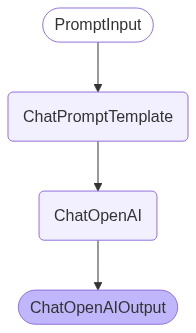

In [ ]:
from IPython.display import Image, display

display(Image(llm_chain.get_graph().draw_mermaid_png()))

In [ ]:
print(llm_chain.get_graph().draw_ascii())

    +-------------+    
    | PromptInput |    
    +-------------+    
           *           
           *           
           *           
+--------------------+ 
| ChatPromptTemplate | 
+--------------------+ 
           *           
           *           
           *           
    +------------+     
    | ChatOpenAI |     
    +------------+     
           *           
           *           
           *           
 +------------------+  
 | ChatOpenAIOutput |  
 +------------------+  


In [ ]:
response = llm_chain.invoke({'topic': 'Generative AI'})
response

AIMessage(content='- **Definition and Functionality**: Generative AI refers to a class of artificial intelligence models that can create new content, such as text, images, music, or videos, by learning patterns and structures from existing data. These models, like GPT-3 for text or DALL-E for images, use deep learning techniques to generate outputs that mimic human-like creativity.\n\n- **Applications**: Generative AI has a wide range of applications across various fields, including content creation (e.g., writing articles, generating art), entertainment (e.g., video game design, music composition), and even in industries like healthcare (e.g., drug discovery) and marketing (e.g., personalized advertising).\n\n- **Ethical Considerations**: The rise of generative AI raises important ethical questions, such as concerns about copyright infringement, misinformation, and the potential for misuse in creating deepfakes or harmful content. Addressing these issues is crucial for the responsible

In [ ]:
print(response.content)

- **Definition and Functionality**: Generative AI refers to a class of artificial intelligence models that can create new content, such as text, images, music, or videos, by learning patterns and structures from existing data. These models, like GPT-3 for text or DALL-E for images, use deep learning techniques to generate outputs that mimic human-like creativity.

- **Applications**: Generative AI has a wide range of applications across various fields, including content creation (e.g., writing articles, generating art), entertainment (e.g., video game design, music composition), and even in industries like healthcare (e.g., drug discovery) and marketing (e.g., personalized advertising).

- **Ethical Considerations**: The rise of generative AI raises important ethical questions, such as concerns about copyright infringement, misinformation, and the potential for misuse in creating deepfakes or harmful content. Addressing these issues is crucial for the responsible development and deploy

Adding an output parser now to just get the response as a string

In [ ]:
# Updated import path for output parsers:
from langchain_core.output_parsers import StrOutputParser

# chain with an output parser
llm_chain = (
    prompt
      |
    chatgpt
      |
    StrOutputParser()
)

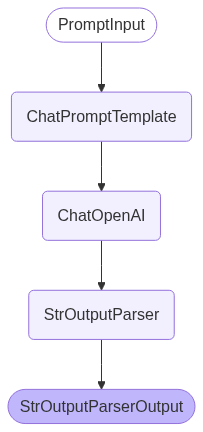

In [ ]:
display(Image(llm_chain.get_graph().draw_mermaid_png()))

In [ ]:
response = llm_chain.invoke({'topic': 'Generative AI'})
print(response)

- **Definition and Functionality**: Generative AI refers to a class of artificial intelligence models that can create new content, such as text, images, music, or videos, by learning patterns from existing data. These models, like GPT-3 for text or DALL-E for images, use deep learning techniques to generate outputs that mimic human-like creativity.

- **Applications**: Generative AI has a wide range of applications, including content creation (e.g., writing articles, generating artwork), enhancing creative processes (e.g., assisting in music composition), and even in fields like gaming and virtual reality, where it can create immersive environments and characters.

- **Ethical Considerations**: The rise of generative AI raises important ethical questions, such as issues of copyright, misinformation, and the potential for misuse in creating deepfakes or harmful content. As a result, there is an ongoing discussion about the need for regulations and guidelines to ensure responsible use of

In [ ]:
reviews = [
    f"""
    Purchased this adorable koala plush toy for my nephew's birthday,
    and he's absolutely smitten with it, carrying it around everywhere he goes.
    The plush is incredibly soft, and the koala's face has an endearing expression.
    However, I did find it a tad on the smaller side given its price point.
    I believe there may be larger alternatives available at a similar price.
    To my delight, it arrived a day earlier than anticipated,
    allowing me to enjoy it briefly before gifting it to him.
    """,
    f"""
    Required a stylish lamp for my office space, and this particular one
    came with added storage at a reasonable price.
    The delivery was surprisingly quick, arriving within just two days.
    However, the pull string for the lamp suffered damage during transit.
    To my relief, the company promptly dispatched a replacement,
    which arrived within a few days. Assembly was a breeze.
    Then, I encountered an issue with a missing component,
    but their support team responded swiftly and provided the missing part.
    It appears to be a commendable company that genuinely values its
    customers and the quality of its products.
    """
    ]

In [ ]:
from langchain.prompts import ChatPromptTemplate

prompt = """
            Act as a product review analyst.
            Your task is to generate a short summary of a product
            review from an ecommerce site.

            Generate a summary of the review (max 2 lines)
            Also show both the positives and negatives from the review (max 2 bullets)

            ```{review}```
"""

prompt_template = ChatPromptTemplate.from_template(prompt)
llm_chain = (
    prompt_template
      |
    chatgpt
      |
    StrOutputParser()
)

In [ ]:
result = llm_chain.invoke({'review': reviews[0]})

In [ ]:
result

'**Summary:** The koala plush toy is soft and adorable, making it a hit with the recipient, though its size may not justify the price.\n\n**Positives:**\n- Incredibly soft and endearing design.\n- Early delivery enhanced the gifting experience.\n\n**Negatives:**\n- Smaller than expected for the price.\n- Larger alternatives may be available at a similar cost.'

In [ ]:
print(result)

**Summary:** The koala plush toy is soft and adorable, making it a hit with the recipient, though its size may not justify the price.

**Positives:**
- Incredibly soft and endearing design.
- Early delivery enhanced the gifting experience.

**Negatives:**
- Smaller than expected for the price.
- Larger alternatives may be available at a similar cost.


In [ ]:
formatted_reviews = [{'review': review}
                        for review in reviews]

results = llm_chain.map().invoke(formatted_reviews)
len(results)

2

In [ ]:
for result in results:
    print(result)
    print()

**Summary:** The koala plush toy is soft and adorable, making it a hit with the recipient, though its size may not justify the price.

**Positives:**
- Incredibly soft and endearing design.
- Early delivery enhanced the gifting experience.

**Negatives:**
- Smaller than expected for the price.
- Larger alternatives may be available at a similar cost.

**Summary:** A stylish and functional lamp with quick delivery and excellent customer support, though it had some initial issues with damaged and missing components.

**Positives:**
- Quick delivery and easy assembly.
- Responsive customer support that promptly addressed issues.

**Negatives:**
- Pull string was damaged during transit.
- Missing component required additional support intervention.

